## ***Load Necessary Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression

## ***Load DataSet***

In [4]:
data = pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

#### ***Get Rid Of Null Values***

In [7]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
data.drop(columns=['Serial No.'], inplace = True)

## ***EDA***

- Let's visualize the data and analyze the relationship between independent and dependent variable

- **let's see how data is `distributed for every column`**

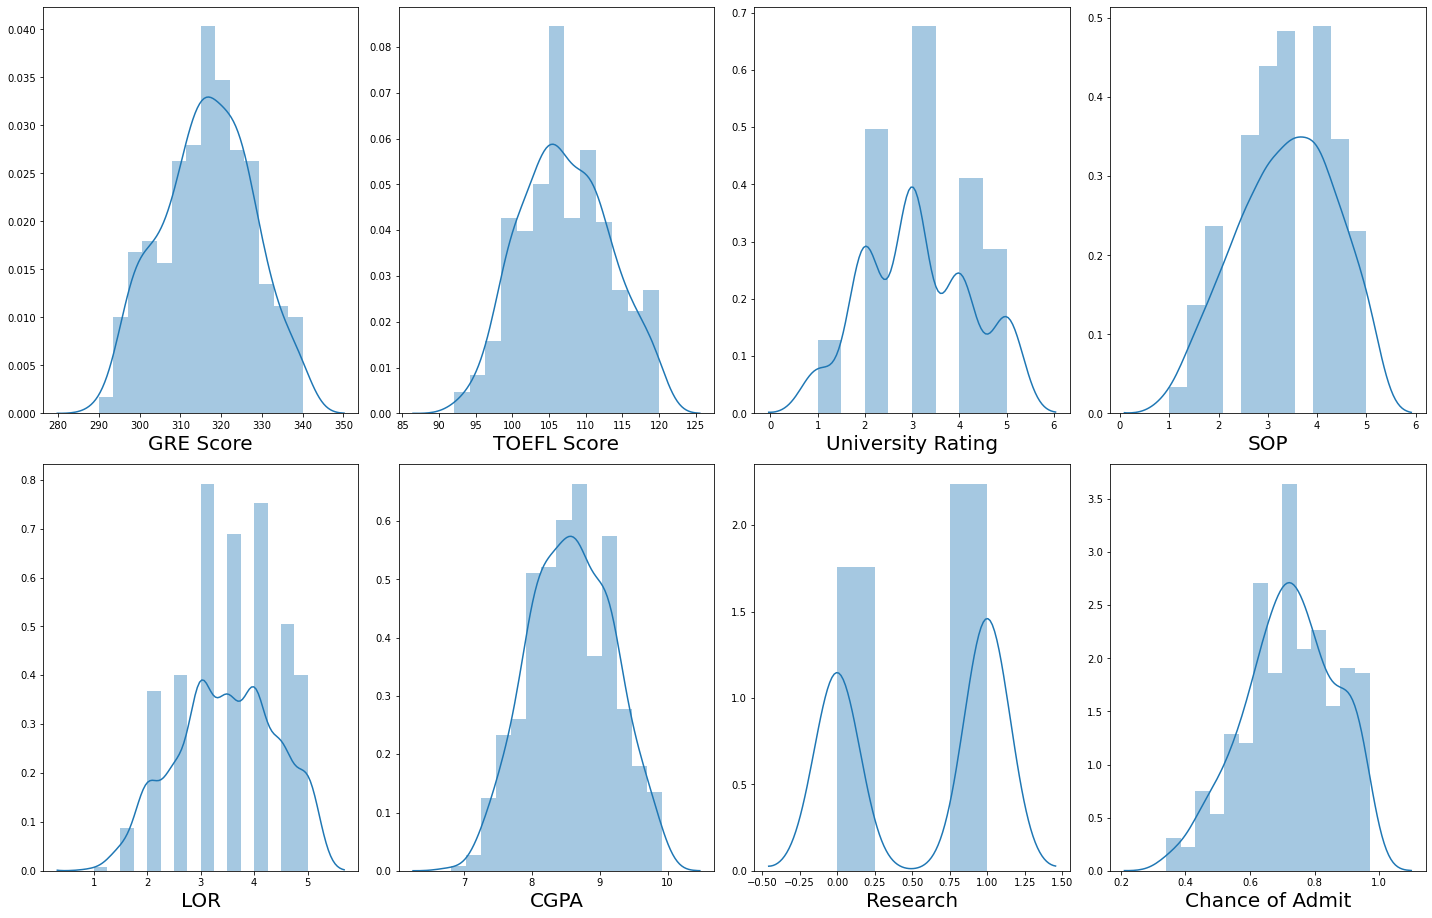

In [10]:
plt.figure(figsize=(20,25))
plotno = 1

for col in data:
    if plotno <= 16:
        ax = plt.subplot(4,4, plotno)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize = 20)
    plotno += 1
plt.tight_layout()

- The data distribution looks `decent enough` and there doesn't seem to be any `skewness`.
- great let's go ahead!

#### ***Seperate dependent and independent variable***


In [11]:
y = data['Chance of Admit']
X = data.drop(columns=['Chance of Admit'])

- let's observe the relationship between independent(x) and dependent(y) variable

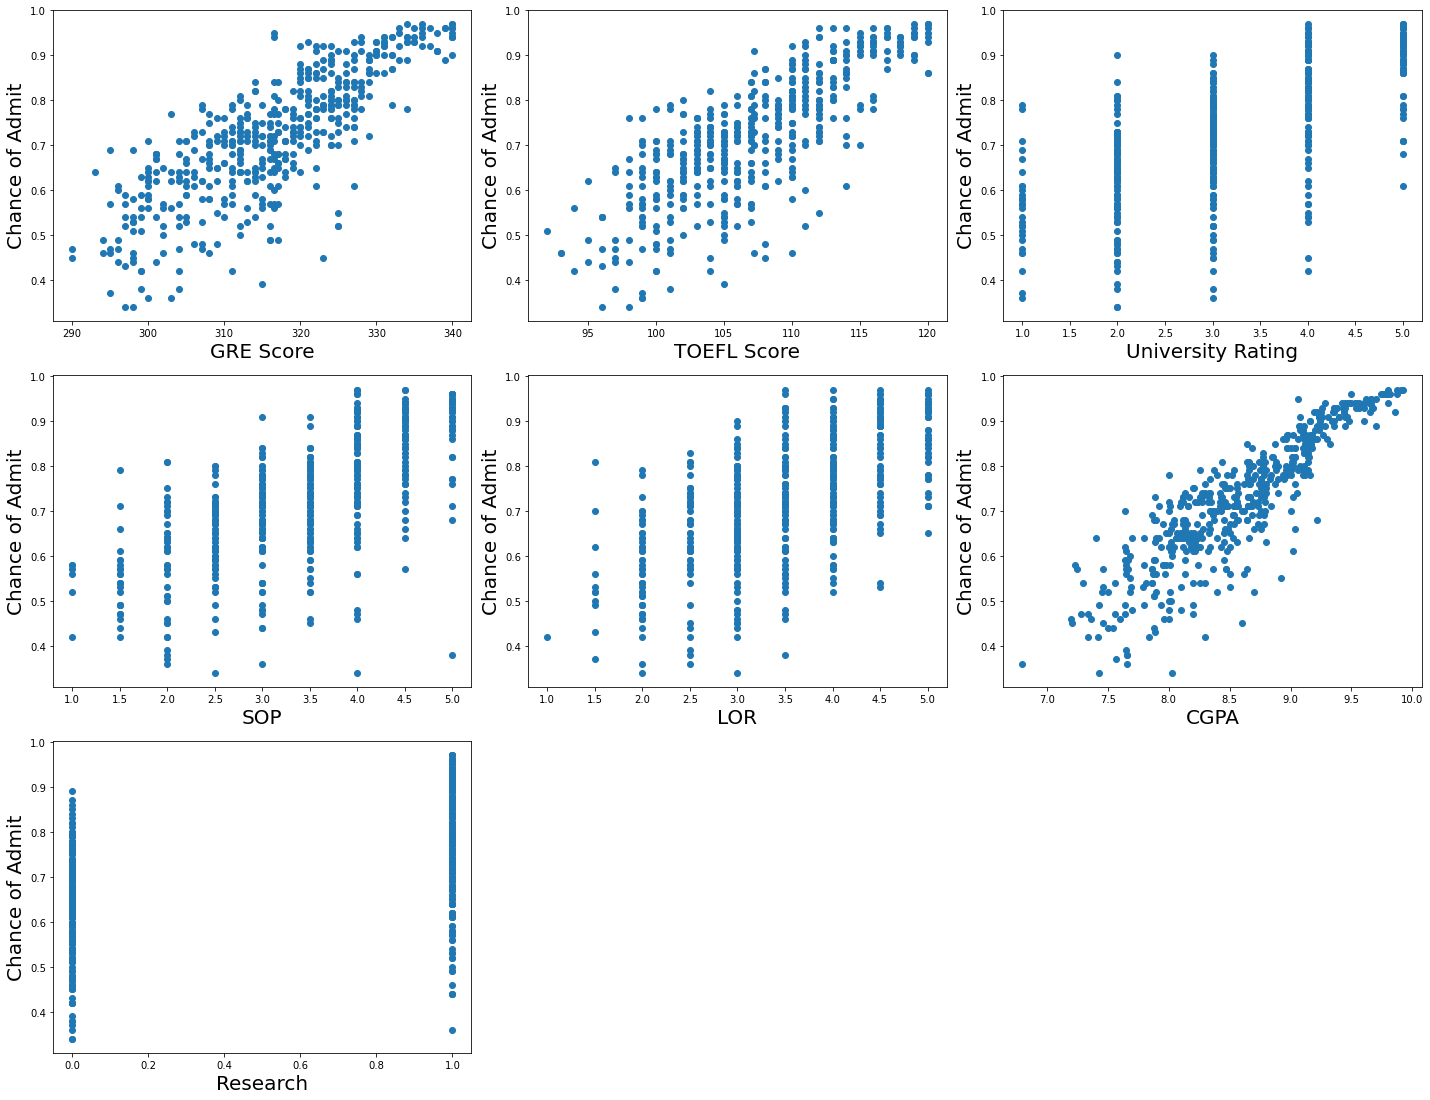

In [12]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25))
plotno = 1

for col in X:
    if plotno <= 15:
        ax = plt.subplot(5,3, plotno)
        plt.scatter(X[col], y)
        plt.xlabel(col, fontsize = 20)
        plt.ylabel('Chance of Admit', fontsize = 20)
    plotno += 1
plt.tight_layout()

- The relationship between the dependent and independent variable look `fairly linear`, thus our linearity assumption is `satisfied`.
- let's move ahead and `check for multicolinearity`.

## ***Data Standardization***

In [13]:
scale = StandardScaler()

In [14]:
X_scale = scale.fit_transform(X)

## ***Check for Multicolinearity***
- Using **VIF** 
- we create a new `data frame` which will include all the `VIFs`
- `note that each variable had it's own VIF` as this measure is variable specific (not model specific) we do **not include `categorical values` for multicolinearity** as they do not provide much information as numerical ones do.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
vif = pd.DataFrame()

- here we make use of the VIF, which will basically output the respective VIFs,

In [17]:
vif['VIF'] = [variance_inflation_factor(X_scale, i) for i in range(X_scale.shape[1])]

In [18]:
vif['Feature'] = X.columns

In [19]:
vif

,VIF,Feature
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


- Here, we have the `correlation values for all the features`. As a thumb rule, a **VIF value greater than 5** means a `very severe multicollinearity`. We don't have VIF greater than 5 , so we are good to go.
- Great! Let's go ahead and use `linear regression` and see how good it fits our data.
- But first. let's split our data in train and test.

## ***Split data into Train and Test***

In [21]:
x_trian, x_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.25, random_state = 355)                                          

In [22]:
x_trian.shape, x_test.shape, y_train.shape

((375, 7), (125, 7), (375,))

## ***Model Training Using Linear Regression Algo***

In [23]:
lr = LinearRegression()
lr.fit(x_trian, y_train)

LinearRegression()

In [24]:
import pickle

- saving the model to the local file system

In [ ]:
filename = 'final_model.pickle'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

#### test the model

In [ ]:
a = load_model.predict(scale.transform([[300,110,5,5,5,10,1]]))
a

## ***Model Accuracy***

- let's create a function to create **adjusted R_sq**


In [25]:
def adj_r2(x,y):
    r2 = lr.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

### **Accuracy for Train data**

In [26]:
print("Score:          ",lr.score(x_trian,y_train))
print("Adjusted R_sq:  ",adj_r2(x_trian,y_train))

Score:           0.8415250484247909
Adjusted R_sq:   0.8385023654247188


- Our `Score` is **84.15%** and `adj r2` is **83.85%** for our training et., so looks like we are not being penalized by use of any feature.
- Let's check how `well model fits the test data`.
- Now let's check if our model is `overfitting our data using regularization`.

### **Accuracy for Test data**

In [27]:
print("Score:          ",lr.score(x_test,y_test))
print("Adjusted R_sq:  ",adj_r2(x_test, y_test))

Score:           0.7534898831471067
Adjusted R_sq:   0.7387414146174465


- So it looks like our model **train data** `score` is **`less`** on the **test data**.

## ***Regularization***
- 1). **`Lasso (L1)`**
- 2). **`Ridge (L2)`**
- 3). **`Elastic Net`**

- Let's see if our model is `overfitting` our training data or not.

## 1. **`Lasso Regression`**

- **LassoCV** will **return best alpha** and **coeff.** after performing 10 CV

In [29]:
lasscv = LassoCV(alphas = None, cv = 10, max_iter = 1000, normalize = True)
lasscv.fit(x_trian, y_train)

LassoCV(cv=10, normalize=True)

- **best alpha parameter**

In [30]:
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

- now that we have `best parameter`
- let's use **lasso Regression** and see how well our data had fitted before

In [31]:
lass_reg = Lasso(alpha)
lass_reg.fit(x_trian, y_train)

Lasso(alpha=3.0341655445178153e-05)

### **Checking Lasso Score**

- **Score for `train`**

In [32]:
lass_reg.score(x_trian, y_train)

0.841524969566963

- **Score for `test`**

In [33]:
lass_reg.score(x_test, y_test)

0.7534654960492284

- our score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did **not overfit** the data.

## 2. **`Ridge Regression`**

- **RidgeCV** will **return best alpha** and **coeff.** after performing 10 CV
- We will pass an array of random numbers for ridgeCV to select best alpha from them

In [34]:
alpha = np.random.uniform(low = 0, high = 10, size = (50,))
ridgecv = RidgeCV(alphas= alpha, cv = 10 , normalize=True)
ridgecv.fit(x_trian, y_train)

RidgeCV(alphas=array([0.83857195, 1.63288616, 6.82600313, 4.80390715, 8.00762997,
       1.8383693 , 8.48682495, 2.97672   , 7.87251692, 1.06977569,
       1.21829303, 6.4343542 , 9.83903923, 6.90301639, 1.73739148,
       0.54091394, 4.84921583, 8.26112437, 1.32173766, 6.14749615,
       3.79976992, 8.93062294, 5.51810609, 4.41222048, 7.19821857,
       0.04890307, 5.81001601, 0.89719541, 7.47189398, 9.40963314,
       6.21349605, 7.25810324, 4.47359499, 5.02849992, 0.88708345,
       6.97626336, 9.23690053, 4.66518982, 0.74025573, 0.56335559,
       8.85170704, 6.75749162, 1.08758229, 3.3825637 , 3.59223618,
       8.07223501, 1.67747921, 1.57378612, 3.20650627, 2.75714094]),
        cv=10, normalize=True)

- **best alpha parameter**

In [36]:
alpha = ridgecv.alpha_
alpha

0.048903067930247124

- now that we have `best parameter`
- let's use **Ridge Regression** and see how well our data had fitted before

In [37]:
ridge_reg = Ridge(alpha = alpha)
ridge_reg.fit(x_trian, y_train)

Ridge(alpha=0.048903067930247124)

### **Checking Ridge Score**

- **Score for `train`**

In [62]:
ridge_reg.score(x_trian, y_train)

0.8415250400680923

- **Score for `test`**

In [63]:
ridge_reg.score(x_test, y_test)

0.7535063339812192

- we got the **same score using Ridge reg** as well as we got in linear reg so it's safe to say there is `no overfitting`

## 3. **`Elatic Net`**

- **Elatic Net** will **return best alpha** and **coeff.** after performing 10 CV
- We will pass an array of random numbers for ridgeCV to select best alpha from them

In [39]:
elaticv = ElasticNetCV(alphas = None, cv = 10)
elaticv.fit(x_trian, y_train)

ElasticNetCV(cv=10)

- **best alpha parameter**

In [67]:
alpha = elaticv.alpha_
alpha

0.0011069728449315508


- **l1_ratio** gives how close the model is to L1 regulatization below value indicates we are `giving equal prefernce to L1 and L2`

In [40]:
ratio = elaticv.l1_ratio

- now that we have `best parameter`
- let's use **Elastic Net** and see how well our data had fitted before

In [41]:
elastic_reg = ElasticNet(alpha=alpha, l1_ratio = ratio)
elastic_reg.fit(x_trian, y_train)

ElasticNet(alpha=0.048903067930247124)

### **Checking Elastic Net Score**

- **Score for `train`**

In [71]:
elastic_reg.score(x_trian, y_train)

0.8414992926261243

- **Score for `test`**

In [72]:
elastic_reg.score(x_test, y_test)

0.7531695370639867

- So, we can see by using different type of regularization, we still are getting the `same score`. 
- That means our **OLS model has been well trained over the training data** and there is **`no overfitting`**.